In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
df3 = pd.read_csv("Datasets/preprocessed_dataset.csv")

### Dataset for data at admission

In [3]:
df3

,Unnamed: 0,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,0,21,0.486844,1,0.003310,0.001668,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,-0.303876,0,-1.493392,-0.359504,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,7,-0.486350,0,0.003310,0.001668,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,9,1.703337,1,1.980189,-0.762473,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,9,1.520863,1,0.003310,0.001668,1.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,487,2,0.365195,1,-1.107438,-0.348613,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,488,4,-0.547175,1,0.003310,0.001668,1.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
489,489,2,0.121897,0,-0.360432,-0.168911,0.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
490,490,13,-0.607999,0,-0.235931,-0.413960,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Preprocessed dataset

In [4]:
df3 = df3.drop("Unnamed: 0",axis=1)
df3

,hospital_length_of_stay,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Hypertension,Chronic cardiac disease (not hypertension),...,Respiractin,Immunity Advance,Vesicare,Zaxine,Quinine Sulfate,Desvenlafaxine,Glucosamine,Turmeric,Cogentin Tab,Elavil
0,21,0.486844,1,0.003310,0.001668,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,-0.303876,0,-1.493392,-0.359504,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,-0.486350,0,0.003310,0.001668,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9,1.703337,1,1.980189,-0.762473,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,1.520863,1,0.003310,0.001668,1.0,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2,0.365195,1,-1.107438,-0.348613,0.0,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,4,-0.547175,1,0.003310,0.001668,1.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
489,2,0.121897,0,-0.360432,-0.168911,0.0,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
490,13,-0.607999,0,-0.235931,-0.413960,0.0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Splitting train and test dataset
1. y is the Target variable which is the 'hospital_length_of_stay'
2. X will be everything except the target variable

In [5]:
from sklearn.model_selection import train_test_split

X = df3.drop('hospital_length_of_stay', axis =1)

y = df3.hospital_length_of_stay

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Testing for the principal component ananlysis

In [6]:
 # Create PCA object forming 10 PCs
pca = PCA(n_components = 15)
# Transform data
pca_trans = pca.fit_transform(X)     
print(pca_trans)                                                  
print(pca_trans.shape)                                      

[[-0.46417141 -0.80129234  0.25083255 ... -0.12938588 -0.29323618
   0.28743849]
 [-0.99377689  1.12362895  0.58475617 ... -0.01635275 -0.14933299
   0.02397253]
 [ 0.21811314  0.47782886 -0.08690194 ...  0.46393355 -0.03641477
   0.42684981]
 ...
 [-0.5173039   0.14830091  0.27812521 ... -0.81478991  0.03523663
  -0.1752319 ]
 [-0.04720956  0.87070228 -0.31245152 ...  0.09609562 -0.10667522
  -0.31100897]
 [-1.03948595  0.31289641 -1.04146736 ... -0.62722188 -0.03965007
  -0.33185921]]
(492, 15)


In [7]:
## total pca numbers initially
PC_number = np.arange(pca.n_components_) + 1 
print(PC_number)                                                        

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [8]:
#tract proportion of explained variance
var = pca.explained_variance_ 
# we will get 10 value of explained variance
print(var)                                                   

[1.71875355 0.97427485 0.64895225 0.34992135 0.33993993 0.2182952
 0.2046385  0.18647831 0.17734291 0.16880019 0.150371   0.14082846
 0.1375313  0.12710309 0.12371069]


### Plotting the graph for explained variance vs the number of components

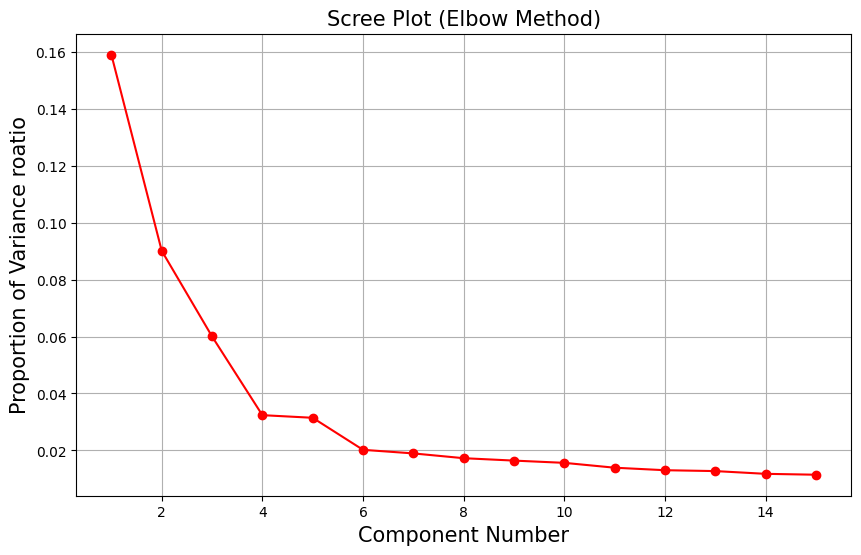

In [9]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))                          
plt.plot(PC_number,                                  
         explained_variance_ratios,
         'ro-')
plt.title('Scree Plot (Elbow Method)',       
          fontsize = 15)
plt.xlabel('Component Number',
           fontsize = 15)
plt.ylabel('Proportion of Variance roatio',
           fontsize = 15)
plt.grid()                                                       
plt.show()                                                    

In [10]:
explained_variance_ratios

array([0.15906993, 0.09016873, 0.06006026, 0.03238508, 0.0314613 ,
       0.02020313, 0.01893921, 0.01725849, 0.01641301, 0.01562239,
       0.01391677, 0.01303362, 0.01272846, 0.01176334, 0.01144937])

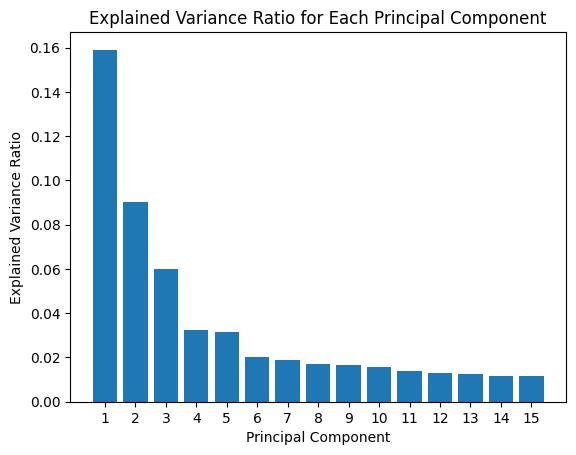

In [11]:
# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Creating a model, initially for lasso regression

In [12]:
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 157.8136540937942


### Getting the importance of the features that is defined by the coeffecients distributed by lasso regression

In [13]:
# Get feature importances from coefficients
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

feature_importances 

,Feature,Importance
481,Quetiapine,14.334114
232,Cymbalta,7.893610
288,Diovan,6.751288
44,reason_for_admission_Respiratory distress [R06.0],5.752694
359,Ventolin,5.170534
...,...,...
271,Ozempic,0.000000
272,Tresiba,0.000000
273,Ralivia,0.000000
274,Ventolin Hfa,0.000000


### Important features are those which have importance of more than 0

In [14]:
# Print feature importances
important_features = feature_importances[feature_importances['Importance']>0]
important_features

,Feature,Importance
481,Quetiapine,1.433411e+01
232,Cymbalta,7.893610e+00
288,Diovan,6.751288e+00
44,reason_for_admission_Respiratory distress [R06.0],5.752694e+00
359,Ventolin,5.170534e+00
201,Avodart,4.910481e+00
388,Janumet Xr,4.385596e+00
72,Lasix Tabs,4.220799e+00
246,Lantus,3.979994e+00
14,Asthma,3.555104e+00


### Dropping the unimportant features from X

In [15]:
feature_array = important_features['Feature'].values

cols_to_drop = [col for col in X.columns if col not in feature_array]

new_x_for_lasso = X.drop(cols_to_drop,axis=1)

### Our new_x_for_lasso will have features that do have only 37 columns

In [16]:
new_x_for_lasso

,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,Diabetes,Other,Obesity,Asthma,...,Decadron Tab,Calcium,Ventolin,Janumet Xr,Phenylephrine Hydrochloride,Quetiapine,Vit D 3,Exetimibe,Rebeprazole,Diamicron
0,1,0.003310,0.001668,0.0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-1.493392,-0.359504,0.0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.003310,0.001668,0.0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1.980189,-0.762473,0.0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.003310,0.001668,1.0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1,-1.107438,-0.348613,0.0,0,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
488,1,0.003310,0.001668,1.0,1,1,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
489,0,-0.360432,-0.168911,0.0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
490,0,-0.235931,-0.413960,0.0,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the new df 
we can see that we are getting the same mse with lesser number of features

In [17]:
X_train, X_test, y_train, y_test = train_test_split(new_x_for_lasso, y, test_size=0.3, random_state=42)

# Train the model using the training data
lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 157.79534242244915


### Again conducting pca in the new df

In [18]:
# Ideal Number of Components
pca = PCA(n_components = 15)                      # Create PCA object forming 10 PCs
pca_trans = pca.fit_transform(new_x_for_lasso)     # Transform data
print(pca_trans)                                                  # Print transformed data
print(pca_trans.shape)                                      # Print dimensions of transformed data

[[ 0.02081472 -0.04710793  0.991585   ... -0.2234608   0.3010242
   0.11696348]
 [-1.41857749  0.7876524  -0.2373149  ... -0.13129593 -0.06209339
   0.02269175]
 [-0.07806419  0.06786893 -0.54951635 ... -0.09604432 -0.10026927
   0.07358334]
 ...
 [-0.49147106  0.19034775  0.42844652 ...  0.07084531 -0.26287568
   0.16738221]
 [-0.56538707 -0.03943712 -0.23594357 ... -0.08684643 -0.03167721
   0.03043872]
 [-1.02282212 -0.90954456 -0.4097409  ... -0.05283922 -0.00989255
  -0.00982531]]
(492, 15)


Explained Variance Ratios for each component:
Component 1: 0.31224489264581845
Component 2: 0.139861004148831
Component 3: 0.06551318616410495
Component 4: 0.05490492618030583
Component 5: 0.04079178358446161
Component 6: 0.03822811613467977
Component 7: 0.03310681112038323
Component 8: 0.03078890061667366
Component 9: 0.02673534580943802
Component 10: 0.023675931487446254
Component 11: 0.020693351090830342
Component 12: 0.017074686466314052
Component 13: 0.01604150461656198
Component 14: 0.013364665361895905
Component 15: 0.012913053223673181


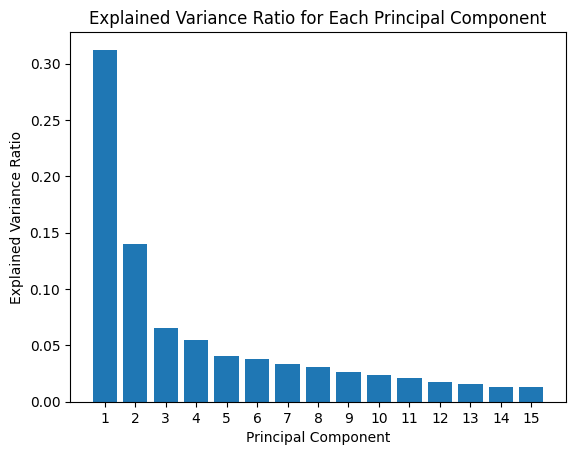

In [19]:
# Get the explained variance ratios for each principal component
explained_variance_ratios = pca.explained_variance_ratio_

# Print the explained variance ratios for each component
print("Explained Variance Ratios for each component:")
for i, var_ratio in enumerate(explained_variance_ratios):
    print(f"Component {i+1}: {var_ratio}")

# Plotting the explained variance ratios
plt.bar(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, align='center')
plt.xticks(range(1, len(explained_variance_ratios) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for Each Principal Component')
plt.show()

### Fitting the reduced dimension values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pca_trans, y, test_size=0.3, random_state=42)

In [21]:
# Train the model using the training data
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 149.36877831592545


### Hyperparameter tuning for lasso

In [106]:
lasso = Lasso()

# Define the hyperparameters to tune
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]} 

# Perform grid search using cross-validation (CV)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Use the best hyperparameters to fit the model
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, best_lasso.predict(X_train))
mse_test = mean_squared_error(y_test, best_lasso.predict(X_test))

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)

Best Alpha: 1
Train MSE: 140.39288830306793
Test MSE: 149.36877831592545


### Using Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 176.71169353611535


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 178.70188852013152


In [27]:
r2_score(y_test,y_pred)

-0.20832372501530716

In [28]:
## how to handle the missing value such as missing year for smoking
## how to handle should we reduce the dimension of the rows as there are 747 columns
## are we using logistic regression to predict a classified dependent variable if yes then how are we to classifiy

In [29]:
rf_regressor = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [50]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [51]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 150}
Best Model: RandomForestRegressor(max_depth=5, min_samples_leaf=4, n_estimators=150,
                      random_state=42)


In [52]:
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)

In [53]:
mse

0.2329204754926282

In [54]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Generate sample data
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the RandomForestRegressor and hyperparameter distributions
rf_regressor = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate and print Mean Squared Error (MSE) using the best model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) with Best Model:", mse)


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 125}
Mean Squared Error (MSE) with Best Model: 2565.649842419421


In [55]:
c_space = np.logspace(-5, 8, 15)

In [56]:
c_space

array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])